In [2]:
#Exercise #1: Fashion MNIST and CNN/RNN (100 marks

In [3]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential


1
a

## **GET THE DATA**


In [4]:
#I am taking the data from keras with split train test
(train_minh_img, train_minh_label), (test_minh_img, test_minh_label) = tf.keras.datasets.fashion_mnist.load_data()


train_minh = {'images': train_minh_img, 'labels': train_minh_label}
test_minh = {'images': test_minh_img, 'labels': test_minh_label}



4422102/4422102 [==============================] - 0s 0us/step


## **B. Initial exploration**


In [5]:
print("size of train set")
train_minh_img.shape[0]

size of train set


60000

In [6]:
print("size of test set")
test_minh_img.shape[0]

size of test set


10000

In [7]:
#resolution
train_minh_img.shape[1:]



(28, 28)

In [8]:
test_minh_img.shape[1:]


(28, 28)

In [9]:
print("The largest pixel value:" , np.amax(train_minh_img))


The largest pixel value: 255


In [10]:
train_minh['images'] = train_minh['images']/255
test_minh['images'] = test_minh['images']/255





In [11]:
#checking

train_minh


{'images': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0.,

In [12]:
#
test_minh

{'images': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0.,

In [13]:
#Using tenflow's build in method to_cateogircal() to one-hot encode the
# labels. Store results back into train_firstname['labels'] and
# test_firstname['labels']. For more info checkout:
train_minh['labels'] = tf.keras.utils.to_categorical(train_minh['labels'])
#makes utils to categorical
test_minh['labels'] = tf.keras.utils.to_categorical(test_minh['labels'])


In [14]:
print(train_minh['labels'].shape)

print(test_minh['labels'].shape)

#notes

(60000, 10)
(10000, 10)


## **D. Visualization Data Preparation**


In [15]:
class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


Predicted class: Trouser
True class: Trouser


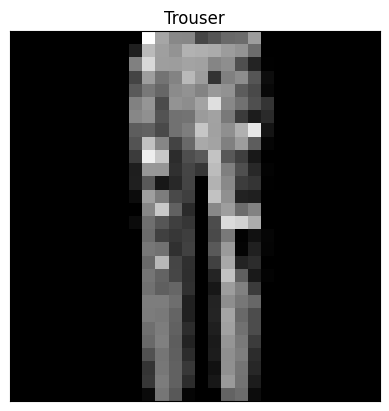

In [16]:
import matplotlib.pyplot as plt

def display_image(index, img_data, label_data):
    plt.imshow(img_data[index], cmap="gray")
    predicted_class = class_name[np.argmax(label_data[index])]
    true_class = class_name[np.argmax(label_data[index])]
    print("Predicted class:", predicted_class)
    print("True class:", true_class)
    plt.title(true_class)
    plt.xticks([])
    plt.yticks([])

n = 115
display_image(n, train_minh['images'], train_minh['labels'])


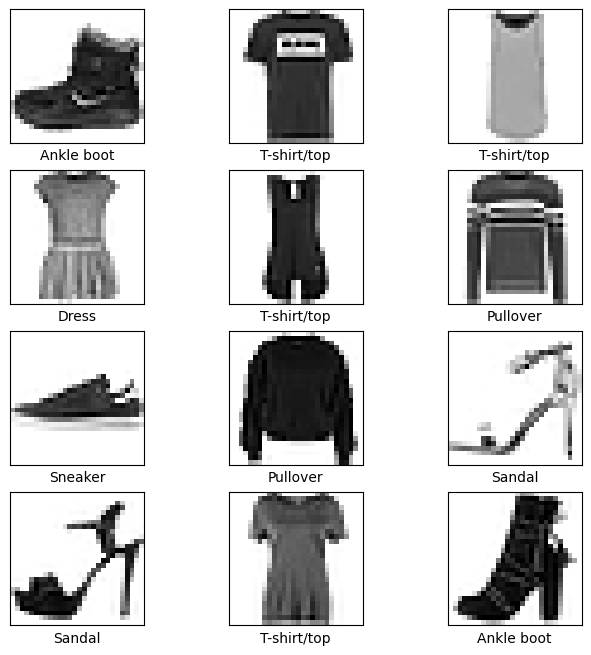

In [17]:
#plot data sample
plt.figure(figsize=(8, 8))

for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_minh_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_minh_label[i]])
plt.show()


## **e. Training Data Preparation**


In [18]:
from sklearn.model_selection import train_test_split
x_train_minh, x_val_minh, y_train_minh, y_val_minh = train_test_split(train_minh['images'], train_minh['labels'], test_size=0.2, random_state=5)

In [19]:
cnn_model_minh = Sequential()
#i
#use step b
input_shape = (28,28,1)
#ii 32 fileter kernels - relu
cnn_model_minh.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#iii max pooling , 2x2
cnn_model_minh.add(MaxPooling2D((2, 2)))
#iv relu activation , filter
cnn_model_minh.add(Conv2D(32, (3, 3), activation='relu'))

#v maaxpooling 2x2
cnn_model_minh.add(MaxPooling2D((2, 2)))
#vi connect 100 neuron -flatten first
cnn_model_minh.add(Flatten())
cnn_model_minh.add(Dense(100, activation='relu'))
#output = size
cnn_model_minh.add(Dense(10, activation='softmax'))

#2
cnn_model_minh.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [20]:
#3
cnn_model_minh.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               8

INSERT DRAWING HERE

In [ ]:


# Input Image (28x28x1)

#        |
#        V
#  Conv2D (32 filters)   ->    MaxPooling2D
#   (26x26x32)                    (13x13x32)
#        |
#        V
#  Conv2D (32 filters)   ->    MaxPooling2D
#   (11x11x32)                     (5x5x32)
#        |
#        V
#       Flatten
#        |
#        V
#       Dense (100 units)
#        |
#        V
#       Dense (10 units)
#        |
#        V
#    Output (10 classes)


In [21]:
x_train_minh = x_train_minh.reshape(x_train_minh.shape[0],28,28,1)
x_val_minh = x_val_minh.reshape(x_val_minh.shape[0],28,28,1)
print(x_train_minh.shape)
print(x_val_minh.shape)

#reshape ^

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [22]:
#4

cnn_history_minh = cnn_model_minh.fit(x_train_minh, y_train_minh,
                                      epochs=8, batch_size=256, validation_data=(x_val_minh, y_val_minh))

Epoch 1/8
188/188 [==============================] - 33s 162ms/step - loss: 0.7145 - accuracy: 0.7443 - val_loss: 0.5423 - val_accuracy: 0.7882
Epoch 2/8
188/188 [==============================] - 29s 157ms/step - loss: 0.4405 - accuracy: 0.8414 - val_loss: 0.4306 - val_accuracy: 0.8473
Epoch 3/8
188/188 [==============================] - 28s 149ms/step - loss: 0.3878 - accuracy: 0.8610 - val_loss: 0.3995 - val_accuracy: 0.8631
Epoch 4/8
188/188 [==============================] - 29s 153ms/step - loss: 0.3563 - accuracy: 0.8724 - val_loss: 0.3599 - val_accuracy: 0.8721
Epoch 5/8
188/188 [==============================] - 28s 148ms/step - loss: 0.3323 - accuracy: 0.8803 - val_loss: 0.3559 - val_accuracy: 0.8717
Epoch 6/8
188/188 [==============================] - 30s 161ms/step - loss: 0.3145 - accuracy: 0.8862 - val_loss: 0.3289 - val_accuracy: 0.8820
Epoch 7/8
188/188 [==============================] - 29s 154ms/step - loss: 0.2959 - accuracy: 0.8930 - val_loss: 0.3365 - val_accuracy:

#g. Test and analyze the model


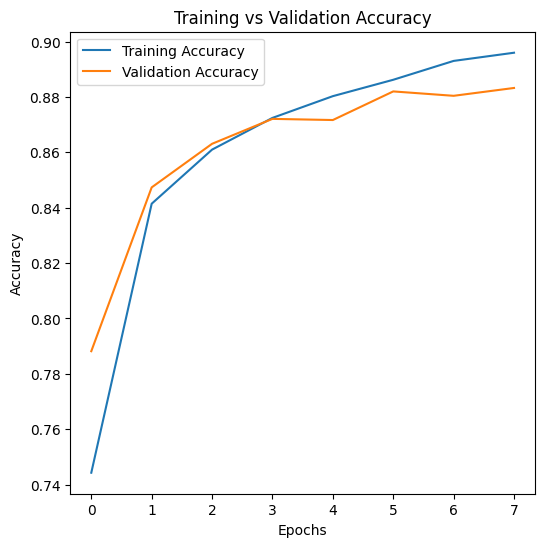

In [23]:
#1
from matplotlib.pyplot import figure

plt.figure(figsize=(6, 6))
plt.plot(cnn_history_minh.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_minh.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
#2
test_minh['images'] = test_minh['images'].reshape(test_minh['images'].shape[0],28,28,1)
test_loss, test_accuracy = cnn_model_minh.evaluate(test_minh['images'], test_minh['labels'])
test_loss,

print(test_accuracy)
#print(val_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3277 - accuracy: 0.8830
0.8830000162124634


In [25]:
#3
cnn_predictions_minh = cnn_model_minh.predict(test_minh['images'])

313/313 [==============================] - 2s 7ms/step


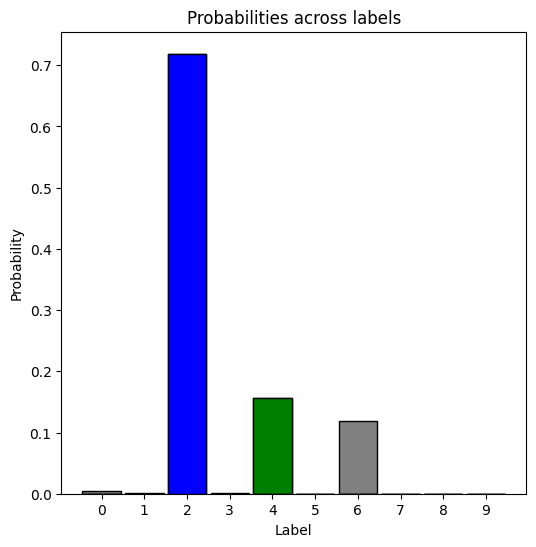

In [26]:
import matplotlib.pyplot as plt
import numpy as np

label_range = np.arange(10)
bins = np.arange(11)
plt.figure(figsize=(6, 6))

def plot_probability_histogram(weights, label):
    plt.hist(label_range, bins=bins, weights=weights, align='left', rwidth=0.9, color='grey', edgecolor='black')
    plt.hist(label_range, bins=bins, weights=np.multiply(weights, label), align='left', rwidth=0.9, color='green', edgecolor='black')
    pred_label = np.zeros(10)
    pred_label[np.argmax(weights)] = 1
    plt.hist(label_range, bins=bins, weights=np.multiply(weights, pred_label), align='left', rwidth=0.9, color='blue', edgecolor='black')

    plt.title('Probabilities across labels')
    plt.xlabel('Label')
    plt.ylabel('Probability')
    plt.xticks(label_range)
    plt.show()

# Example usage:
plot_probability_histogram(cnn_predictions_minh[25], test_minh['labels'][25])



Plot images (d.1)
Predicted class: Coat
True class: Coat
Predicted class: Bag
True class: Bag
Predicted class: T-shirt/top
True class: T-shirt/top
Predicted class: Sneaker
True class: Sneaker


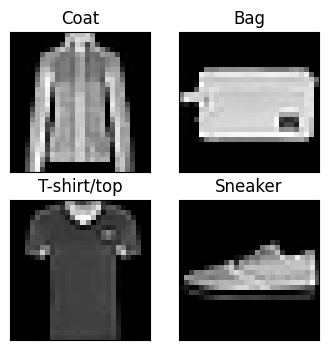


Plot probability histogram (g.4)


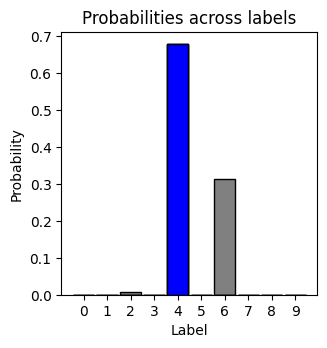

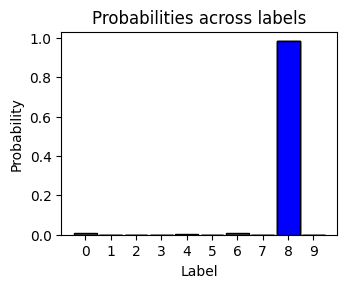

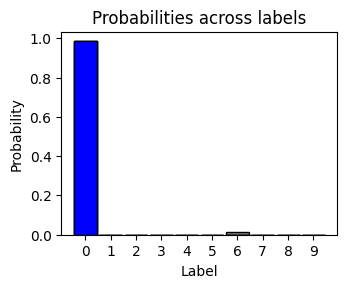

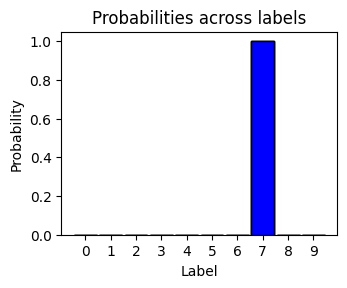

In [27]:
# 5.
#301212556 - > 56
student_number = 56
img_index = [student_number+1,student_number+2,student_number+3,student_number+4]

print("\nPlot images (d.1)")
plt.figure(figsize=(4, 4))
for i in img_index:
   plt.subplot(2, 2, i-student_number)
   display_image(i,test_minh['images'],test_minh['labels'])
plt.show()

print("\nPlot probability histogram (g.4)")
plt.figure(figsize=(6, 6))
for i in img_index:
  plt.subplot(2, 2, i-student_number)
  plt.tight_layout()
  plot_probability_histogram(cnn_predictions_minh[i], test_minh['labels'][i])
plt.show()


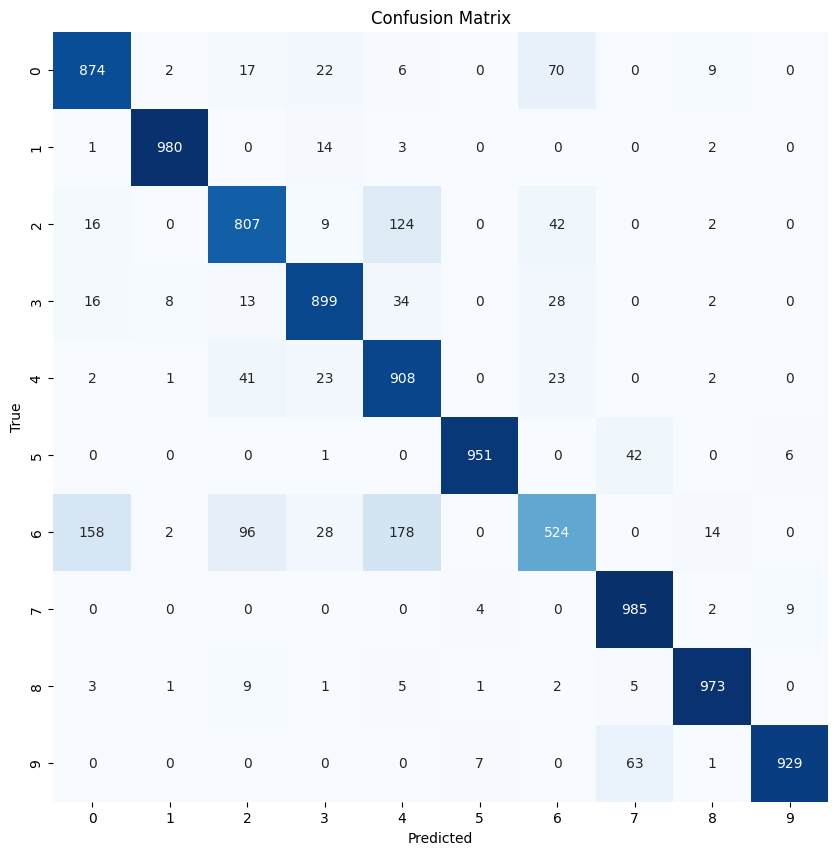

In [28]:
# 7.


from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_classes = np.argmax(cnn_predictions_minh, axis=1)
y_true_classes = np.argmax(test_minh['labels'], axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot using sns and plt
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
print(cm)


[[874   2  17  22   6   0  70   0   9   0]
 [  1 980   0  14   3   0   0   0   2   0]
 [ 16   0 807   9 124   0  42   0   2   0]
 [ 16   8  13 899  34   0  28   0   2   0]
 [  2   1  41  23 908   0  23   0   2   0]
 [  0   0   0   1   0 951   0  42   0   6]
 [158   2  96  28 178   0 524   0  14   0]
 [  0   0   0   0   0   4   0 985   2   9]
 [  3   1   9   1   5   1   2   5 973   0]
 [  0   0   0   0   0   7   0  63   1 929]]


In [30]:
#build
#h build-train-test and analzye RNN
rnn_model_minh = Sequential([
    LSTM(128, input_shape=(28, 28), activation='tanh'),  # Input shape: (timestep, input_dim)
    Dense(10, activation='softmax')  # Output size from Step c.3
])
#compile , apply loss
rnn_model_minh.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





In [31]:
history_rnn = rnn_model_minh.fit(x_train_minh, y_train_minh, epochs=10, validation_data=(x_val_minh, y_val_minh))

Epoch 1/10
1500/1500 [==============================] - 66s 42ms/step - loss: 0.6066 - accuracy: 0.7765 - val_loss: 0.4653 - val_accuracy: 0.8267
Epoch 2/10
1500/1500 [==============================] - 56s 38ms/step - loss: 0.4241 - accuracy: 0.8421 - val_loss: 0.4054 - val_accuracy: 0.8525
Epoch 3/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.3708 - accuracy: 0.8621 - val_loss: 0.3838 - val_accuracy: 0.8592
Epoch 4/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.3442 - accuracy: 0.8716 - val_loss: 0.3420 - val_accuracy: 0.8739
Epoch 5/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3211 - accuracy: 0.8810 - val_loss: 0.3319 - val_accuracy: 0.8752
Epoch 6/10
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3042 - accuracy: 0.8879 - val_loss: 0.3207 - val_accuracy: 0.8800
Epoch 7/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2881 - accuracy: 0.8928 - val_loss: 0.3203 -

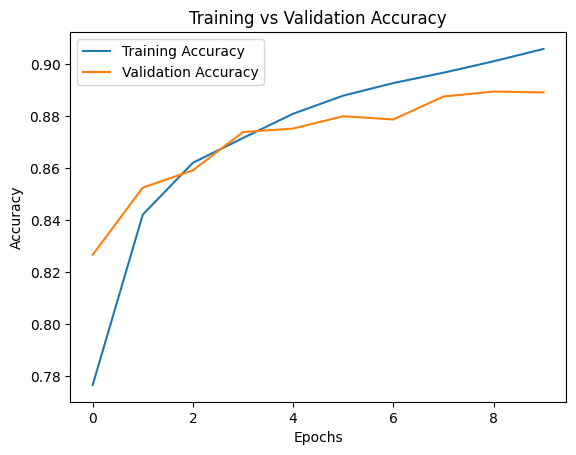

In [32]:
import matplotlib.pyplot as plt

plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()